In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [28]:
import numpy as np
import matplotlib.pyplot as plt
i1= np.array([np.array([400,400]),np.array([400,400])])
i2 =np.array([np.array([400,400]),np.array([0,0])])
i3 =np.array([np.array([400,0]),np.array([400,0])])
i4 =np.array([np.array([400,0]),np.array([0,400])])
i5 =np.array([np.array([400,0]),np.array([400,400])])

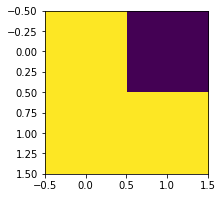

In [29]:
plt.figure(figsize=(3,3))
plt.imshow(i5)

In [30]:
k_h = np.array([np.array([2,2]),np.array([-2,-2])])
k_v = np.array([np.array([2,-2]),np.array([2,-2])])
k_d = np.array([np.array([2,-2]),np.array([-2,2])])

def applyKernel(img, kernel):
  return np.sum(np.multiply(img, kernel)) 

edgeDetected = lambda val: 'Edge Detected' if val>0 else 'No Edge Detected'

In [32]:
for i in [i1,i2,i3,i4,i5]:
  print('Top Horizontal: ' + edgeDetected(applyKernel(i,k_h)))
  print('Right Vertical: ' +edgeDetected(applyKernel(i,k_v)))
  print('Pos Diagonal: ' +edgeDetected(applyKernel(i,k_d)))
  print('****')

Top Horizontal: No Edge Detected
Right Vertical: No Edge Detected
Pos Diagonal: No Edge Detected
****
Top Horizontal: Edge Detected
Right Vertical: No Edge Detected
Pos Diagonal: No Edge Detected
****
Top Horizontal: No Edge Detected
Right Vertical: Edge Detected
Pos Diagonal: No Edge Detected
****
Top Horizontal: No Edge Detected
Right Vertical: No Edge Detected
Pos Diagonal: Edge Detected
****
Top Horizontal: No Edge Detected
Right Vertical: Edge Detected
Pos Diagonal: Edge Detected
****


In [35]:
!ls

001.jpg  sample_data


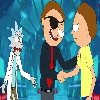

In [37]:
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('001.jpg')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

In [46]:
from tensorflow import keras
from keras.models import Model
from keras.applications.vgg16 import VGG16
model = VGG16()
kernels, biases =  model.layers[1].get_weights()
fmin,fmax = kernels.min(), kernels.max()
# MINMAX-> imgs normalization
filters_norm = (kernels - fmin) / (fmax - fmin)

# y = kernerls * image + bias

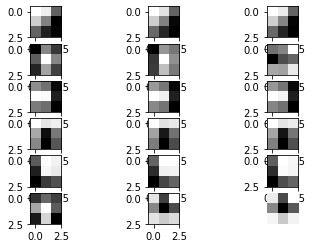

In [47]:
n_filters , ix = 6,1
for i in range(n_filters):
  f = kernels[:,:,:,i]
  for j in range(3):
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix= ix+1

plt.axis('off')
plt.show()

In [48]:
for layer in model.layers:
  try:
    kernels, biases = layer.get_weights()
    print(layer.name)
    print(len(kernels[0][0]))
  except:
    continue 

block1_conv1
3
block1_conv2
64
block2_conv1
64
block2_conv2
128
block3_conv1
128
block3_conv2
256
block3_conv3
256
block4_conv1
256
block4_conv2
512
block4_conv3
512
block5_conv1
512
block5_conv2
512
block5_conv3
512
fc1
fc2
predictions


In [50]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
img = load_img('001.jpg', target_size=(224,224))
img = img_to_array(img)
img.shape

(224, 224, 3)

In [52]:
img[0][0]

array([ 17.,  59., 101.], dtype=float32)